# HW6: Regression

## Syed Nisar Hussain

### sh07216@st.habib.edu.pk


In [81]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [82]:
df = pd.read_csv("HousePricingData.csv")
df

,Id,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,SaleCondition,SalePrice
0,1,8450,7,5,2003,856,856,854,1710,1,0,2,1,3,1,0,2,Y,Normal,208500
1,2,9600,6,8,1976,1262,1262,0,1262,0,1,2,0,3,1,1,2,Y,Normal,181500
2,3,11250,7,5,2001,920,920,866,1786,1,0,2,1,3,1,1,2,Y,Normal,223500
3,4,9550,7,5,1915,756,961,756,1717,1,0,1,0,3,1,1,3,Y,Abnorml,140000
4,5,14260,8,5,2000,1145,1145,1053,2198,1,0,2,1,4,1,1,3,Y,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,6,5,1999,953,953,694,1647,0,0,2,1,3,1,1,2,Y,Normal,175000
1456,1457,13175,6,6,1978,1542,2073,0,2073,1,0,2,0,3,1,2,2,Y,Normal,210000
1457,1458,9042,7,9,1941,1152,1188,1152,2340,0,0,2,0,4,1,2,1,Y,Normal,266500
1458,1459,9717,5,6,1950,1078,1078,0,1078,1,0,1,0,2,1,0,1,Y,Normal,142125


In [83]:
df = df.drop('Id',axis=1)

### Question 1


In [84]:
X = df.drop(['SalePrice'],axis=1)
Y = df['SalePrice']

In [85]:
X = sm.add_constant(X['GrLivArea'])

In [86]:
model1 = sm.OLS(Y,X).fit()

In [87]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          4.52e-223
Time:                        21:22:39   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Analysis:** R-Squared value is 0.502 (greater than 0.3) which shows that there is a good relationship between our two variables GrLivArea and SalePrice. However the R-squared value is not too large i.e not very close to 1 therefore it still isn't an ideal relationship.

Moreover, we can also conclude that for each unit increase in GrLivArea, the SalePrice goes up by 107.1304.


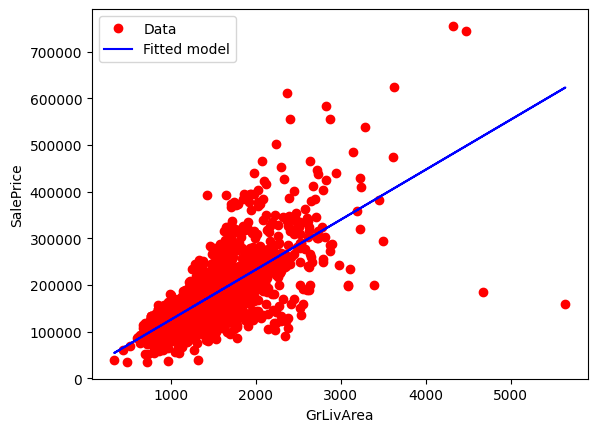

In [88]:
plt.plot(df['GrLivArea'].values, df['SalePrice'].values, 'ro')
plt.plot(df['GrLivArea'].values ,model1.fittedvalues.values,  'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

### Question 2


In [89]:
X = df.drop(['LotArea'],axis=1)
Y = df['LotArea']

In [90]:
X = sm.add_constant(X['TotalBsmtSF'])

In [91]:
model2 = sm.OLS(Y,X).fit()

In [92]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LotArea   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     106.4
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           3.91e-24
Time:                        21:22:39   Log-Likelihood:                -15464.
No. Observations:                1460   AIC:                         3.093e+04
Df Residuals:                    1458   BIC:                         3.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4241.6386    658.492      6.441      0.000    2949.946    5533.331
TotalBsmtSF     5.9344      0.575     10.317      0.000       4.806       7.063
==============================================================================
Omnibus:                     2613.787   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2702216.991
Skew:                          12.411   Prob(JB):                         0.00
Kurtosis:                     212.294   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Analysis:** R-Squared value is 0.068 (lesser than 0.3) which shows that there is a no relationship at all between our two variables TotalBsmtSF and LotArea. As we know, the acceptable range for R-squared value is 0.3 where varaibles can be considered to have a good relationship, however, this value is significantly less than that.


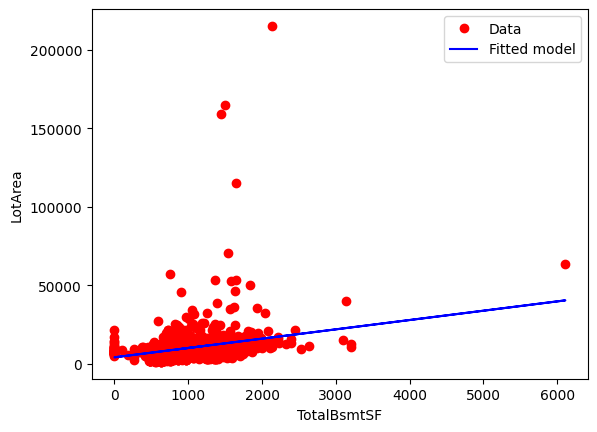

In [93]:
plt.plot(df['TotalBsmtSF'].values, df['LotArea'].values, 'ro')
plt.plot(df['TotalBsmtSF'].values ,model2.fittedvalues.values,  'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('LotArea')
plt.show()

### Question 3


In [94]:
corr1 = df['GrLivArea'].corr(df['SalePrice'])
corr2 = df['TotalBsmtSF'].corr(df['LotArea'])

print(f"Correlation between GrLivArea and SalePrice: {corr1}")
print(f"Correlation between TotalBsmtSF and LotArea: {corr2}")

Correlation between GrLivArea and SalePrice: 0.7086244776126521
Correlation between TotalBsmtSF and LotArea: 0.26083313454515755


**Explanation:** We can observe that the correlation between GrLivArea and SalePrice is more than double that of TotalBsmtSF and LotArea. This shows that GrLivArea and SalePrice have a much stronger positive correlation as compared to TotalBsmtSF and LotArea. This also aligns with what we observed in Question 1 and Question 2, where the R-squared values in Question 1 indicated a better relationship between variables as compared to Question 2, where the R-squared value was very low and indicated an almost non-existent relationship between variables.


### Question 4


In [95]:
X = df.drop(['SalePrice'], axis=1)
Y = df['SalePrice']

In [96]:
X = sm.add_constant(X)

In [97]:
X.head()

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,SaleCondition
0,1.0,8450,7,5,2003,856,856,854,1710,1,0,2,1,3,1,0,2,Y,Normal
1,1.0,9600,6,8,1976,1262,1262,0,1262,0,1,2,0,3,1,1,2,Y,Normal
2,1.0,11250,7,5,2001,920,920,866,1786,1,0,2,1,3,1,1,2,Y,Normal
3,1.0,9550,7,5,1915,756,961,756,1717,1,0,1,0,3,1,1,3,Y,Abnorml
4,1.0,14260,8,5,2000,1145,1145,1053,2198,1,0,2,1,4,1,1,3,Y,Normal


In [98]:
one_hot = pd.get_dummies(df, columns=['PavedDrive', 'SaleCondition'], dtype=int)
one_hot

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SalePrice,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,2003,856,856,854,1710,1,0,...,208500,0,0,1,0,0,0,0,1,0
1,9600,6,8,1976,1262,1262,0,1262,0,1,...,181500,0,0,1,0,0,0,0,1,0
2,11250,7,5,2001,920,920,866,1786,1,0,...,223500,0,0,1,0,0,0,0,1,0
3,9550,7,5,1915,756,961,756,1717,1,0,...,140000,0,0,1,1,0,0,0,0,0
4,14260,8,5,2000,1145,1145,1053,2198,1,0,...,250000,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,953,953,694,1647,0,0,...,175000,0,0,1,0,0,0,0,1,0
1456,13175,6,6,1978,1542,2073,0,2073,1,0,...,210000,0,0,1,0,0,0,0,1,0
1457,9042,7,9,1941,1152,1188,1152,2340,0,0,...,266500,0,0,1,0,0,0,0,1,0
1458,9717,5,6,1950,1078,1078,0,1078,1,0,...,142125,0,0,1,0,0,0,0,1,0


In [99]:
X = one_hot.drop(['SalePrice'], axis=1)
Y = one_hot['SalePrice']

In [100]:
X = sm.add_constant(X)

In [101]:
model4 = sm.OLS(Y,X).fit()

In [102]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     255.0
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:22:40   Log-Likelihood:                -17357.
No. Observations:                1460   AIC:                         3.476e+04
Df Residuals:                    1436   BIC:                         3.489e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.947e+05    7.3e+04     -6.780      0.000   -6.38e+05   -3.52e+05
LotArea                   0.4440      0.102      4.365      0.000       0.244       0.644
OverallQual            1.692e+04   1177.941     14.367      0.000    1.46e+04    1.92e+04
OverallCond            6039.0894    956.584      6.313      0.000    4162.637    7915.541
YearBuilt               341.6491     56.102      6.090      0.000     231.598     451.700
TotalBsmtSF              12.9967      4.158      3.126      0.002       4.841      21.153
1stFlrSF                 36.2027     20.439      1.771      0.077      -3.891      76.297
2ndFlrSF                 25.9362     20.177      1.285      0.199     -13.643      65.515
GrLivArea                30.7754     19.778      1.556      0.120      -8.021      69.572
BsmtFullBath           1.383e+04   2034.384      6.798      0.000    9839.087    1.78e+04
BsmtHalfBath           5091.5630   4051.182      1.257      0.209   -2855.307     1.3e+04
FullBath               2350.7552   2825.817      0.832      0.406   -3192.416    7893.927
HalfBath               -138.2292   2692.136     -0.051      0.959   -5419.170    5142.712
BedroomAbvGr          -5317.9224   1482.744     -3.587      0.000   -8226.498   -2409.346
KitchenAbvGr          -2.131e+04   4855.873     -4.388      0.000   -3.08e+04   -1.18e+04
Fireplaces             5008.3921   1771.339      2.827      0.005    1533.703    8483.081
GarageCars             1.259e+04   1732.280      7.267      0.000    9189.770     1.6e+04
PavedDrive_N          -1.604e+05    2.4e+04     -6.681      0.000   -2.07e+05   -1.13e+05
PavedDrive_P          -1.692e+05   2.46e+04     -6.881      0.000   -2.17e+05   -1.21e+05
PavedDrive_Y          -1.652e+05   2.52e+04     -6.555      0.000   -2.15e+05   -1.16e+05
SaleCondition_Abnorml -9.189e+04   1.28e+04     -7.157      0.000   -1.17e+05   -6.67e+04
SaleCondition_AdjLand  -7.13e+04   1.96e+04     -3.647      0.000    -1.1e+05   -3.29e+04
SaleCondition_Alloca  -8.899e+04   1.57e+04     -5.651      0.000    -1.2e+05   -5.81e+04
SaleCondition_Family  -9.712e+04    1.4e+04     -6.914      0.000   -1.25e+05   -6.96e+04
SaleCondition_Normal  -8.492e+04   1.27e+04     -6.692      0.000    -1.1e+05      -6e+04
SaleCondition_Partial -6.052e+04   1.35e+04     -4.475      0.000    -8.7e+04    -3.4e+04
==============================================================================
Omnibus:                      755.660   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139793.792
Skew:                          -1.296   Prob(JB):                         0.00
Kurtosis:                      50.867   Cond. No.                     5.88e+17
==============================================================================

In [103]:
model4.pvalues.sort_values(ascending=True)

OverallQual              7.800179e-44
GarageCars               6.026648e-13
SaleCondition_Abnorml    1.307567e-12
SaleCondition_Family     7.062461e-12
PavedDrive_P             8.871643e-12
BsmtFullBath             1.550604e-11
const                    1.748584e-11
SaleCondition_Normal     3.154105e-11
PavedDrive_N             3.388581e-11
PavedDrive_Y             7.718488e-11
OverallCond              3.635293e-10
YearBuilt                1.448894e-09
SaleCondition_Alloca     1.920894e-08
SaleCondition_Partial    8.257454e-06
KitchenAbvGr             1.227827e-05
LotArea                  1.360238e-05
SaleCondition_AdjLand    2.748268e-04
BedroomAbvGr             3.463315e-04
TotalBsmtSF              1.808700e-03
Fireplaces               4.756968e-03
1stFlrSF                 7.673325e-02
GrLivArea                1.199107e-01
2ndFlrSF                 1.988429e-01
BsmtHalfBath             2.090272e-01
FullBath                 4.056121e-01
HalfBath                 9.590573e-01
dtype: float

**Analysis (R-squared):**
The R-squared value of 0.803, which is much greater than 0.3, indicates a very good relationship between the variables. This shows that the model is likely to have good performance, i.e. give accurate predictions.

**Analysis (P-values):**
As for the p values, the 3 most significant inputs are OverallQual, GarageCars, and SaleCondition_Abnormal. Whereas, the 3 least significant inputs are HalfBath, FullBath, BsmtHalfBath. These results make sense since condition of the house being abnormal or not will certainly impact it's sale price a lot, moreover the overall quality rating the metric that defines the house in one rating and so its logical that this variable will impact the house price most. Finally, car space in garage indicates a sense of luxury if theres a lot more car space therefore impacting the house price. On the otherhand, the size and places of bathrooms are not as significant when it comes to making huge difference in house prices.


In [104]:

new_input = pd.DataFrame({
    'const': [1],
    'LotArea': [12000],
    'OverallQual': [7],
    'OverallCond': [5],
    'YearBuilt': [2001],
    'TotalBsmtSF': [950],
    '1stFlrSF': [950],
    '2ndFlrSF': [850],
    'GrLivArea': 1800,
    'BsmtFullBath': [1],
    'BsmtHalfBath': [0],
    'FullBath': [2],
    'HalfBath': [1],
    'BedroomAbvGr': [3],
    'KitchenAbvGr': [1],
    'Fireplaces': [1],
    'GarageCars': [2],
    'PavedDrive_N': [0],
    'PavedDrive_P': [0],
    'PavedDrive_Y': [1],
    'SaleCondition_Abnorml': [0],
    'SaleCondition_AdjLand': [0],
    'SaleCondition_Alloca': [0],
    'SaleCondition_Family': [0],
    'SaleCondition_Normal': [1],
    'SaleCondition_Partial': [0]
})
new_input

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageCars,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,12000,7,5,2001,950,950,850,1800,1,...,2,0,0,1,0,0,0,0,1,0


In [105]:
model4.predict(new_input)

0    228301.842736
dtype: float64

### Question 5


In [106]:
X = one_hot.drop(['LotArea'], axis=1)
Y = one_hot['LotArea']

In [107]:
X = sm.add_constant(X)

In [108]:
model5 = sm.OLS(Y,X).fit()

In [109]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LotArea   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     13.01
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           8.65e-45
Time:                        21:22:40   Log-Likelihood:                -15377.
No. Observations:                1460   AIC:                         3.080e+04
Df Residuals:                    1436   BIC:                         3.093e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.331e+04   1.91e+04      2.271      0.023    5902.290    8.07e+04
OverallQual           -1893.6453    320.810     -5.903      0.000   -2522.952   -1264.339
OverallCond             -81.4211    249.930     -0.326      0.745    -571.688     408.845
YearBuilt               -29.0314     14.625     -1.985      0.047     -57.719      -0.343
TotalBsmtSF               1.9934      1.074      1.856      0.064      -0.113       4.100
1stFlrSF                  5.4271      5.272      1.029      0.303      -4.914      15.768
2ndFlrSF                  3.2060      5.202      0.616      0.538      -6.999      13.411
GrLivArea                -1.7279      5.101     -0.339      0.735     -11.735       8.279
BsmtFullBath           1710.6717    530.777      3.223      0.001     669.491    2751.852
BsmtHalfBath           2038.1382   1043.302      1.954      0.051      -8.422    4084.698
FullBath                458.7982    728.374      0.630      0.529    -969.994    1887.590
HalfBath               -527.2643    693.707     -0.760      0.447   -1888.052     833.523
BedroomAbvGr            536.6054    383.595      1.399      0.162    -215.861    1289.072
KitchenAbvGr          -2310.8834   1258.392     -1.836      0.067   -4779.368     157.601
Fireplaces             2219.8838    454.034      4.889      0.000    1329.243    3110.524
GarageCars              559.8016    454.356      1.232      0.218    -331.471    1451.074
SalePrice                 0.0295      0.007      4.365      0.000       0.016       0.043
PavedDrive_N            1.48e+04   6270.666      2.359      0.018    2494.621    2.71e+04
PavedDrive_P           1.493e+04   6428.733      2.322      0.020    2316.301    2.75e+04
PavedDrive_Y           1.359e+04   6580.330      2.065      0.039     681.353    2.65e+04
SaleCondition_Abnorml  7294.3343   3361.770      2.170      0.030     699.828    1.39e+04
SaleCondition_AdjLand  6914.6106   5058.800      1.367      0.172   -3008.819    1.68e+04
SaleCondition_Alloca   7593.4146   4098.862      1.853      0.064    -446.984    1.56e+04
SaleCondition_Family   6751.5498   3675.619      1.837      0.066    -458.608     1.4e+04
SaleCondition_Normal   7791.1782   3314.989      2.350      0.019    1288.439    1.43e+04
SaleCondition_Partial  6966.6380   3504.950      1.988      0.047      91.266    1.38e+04
==============================================================================
Omnibus:                     2614.176   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2806522.416
Skew:                          12.394   Prob(JB):                         0.00
Kurtosis:                     216.355   Cond. No.                     4.09e+17
==============================================================================

In [110]:
model5.pvalues.sort_values(ascending=True)

OverallQual              4.455178e-09
Fireplaces               1.125990e-06
SalePrice                1.360238e-05
BsmtFullBath             1.297222e-03
PavedDrive_N             1.843569e-02
SaleCondition_Normal     1.889359e-02
PavedDrive_P             2.037643e-02
const                    2.328767e-02
SaleCondition_Abnorml    3.018630e-02
PavedDrive_Y             3.908688e-02
SaleCondition_Partial    4.703934e-02
YearBuilt                4.732388e-02
BsmtHalfBath             5.094898e-02
TotalBsmtSF              6.363624e-02
SaleCondition_Alloca     6.414958e-02
SaleCondition_Family     6.643903e-02
KitchenAbvGr             6.650849e-02
BedroomAbvGr             1.620633e-01
SaleCondition_AdjLand    1.718869e-01
GarageCars               2.181220e-01
1stFlrSF                 3.034238e-01
HalfBath                 4.473389e-01
FullBath                 5.288646e-01
2ndFlrSF                 5.378269e-01
GrLivArea                7.348783e-01
OverallCond              7.446413e-01
dtype: float

**Analysis (R-squared):**
The R-squared value of 0.172, which is lesser than 0.3, indicates a very poor relationship between the variables. This shows that the model is unlikely to have good performance, i.e. it will not give accurate predictions.

**Analysis (P-values):**
As for the p values, the 3 most significant inputs are OverallQual, Fireplaces, and SalePrice. Whereas, the 3 least significant inputs are OverallCond, GrLivArea, 2ndFlrSF. Overall quality and the sale price of the house seem like sensible indicators for predicting Lot Area, if the sale price is high, it is likely that LotArea maybe large too. On the other hand, it also makes sense that overall condition of a house tells nothing about the lot area and hence it is most insignificant variable here.


In [111]:
new_input = pd.DataFrame({
    'const': [1],    
    'OverallQual': [6],
    'OverallCond': [7],
    'YearBuilt': [1985],
    'TotalBsmtSF': [1000],
    '1stFlrSF': [1200],
    '2ndFlrSF': [500],
    'GrLivArea': [1700],
    'BsmtFullBath': [1],
    'BsmtHalfBath': [0],
    'FullBath': [2],
    'HalfBath': [1],
    'BedroomAbvGr': [3],
    'KitchenAbvGr': [1],
    'Fireplaces': [1],
    'GarageCars': [2],
    'SalePrice': [180000],
    'PavedDrive_N': [0],
    'PavedDrive_P': [0],
    'PavedDrive_Y': [1],
    'SaleCondition_Abnorml': [0],
    'SaleCondition_AdjLand': [0],
    'SaleCondition_Alloca': [0],
    'SaleCondition_Family': [0],
    'SaleCondition_Normal': [1],
    'SaleCondition_Partial': [0]
})
new_input

,const,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SalePrice,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,6,7,1985,1000,1200,500,1700,1,0,...,180000,0,0,1,0,0,0,0,1,0


In [112]:
model5.predict(new_input)

0    12353.189808
dtype: float64

### Question 6


In [113]:
p_values = model4.pvalues
insignificant = []
for var,p_val in p_values.items():
    if (p_val > 0.05):
        insignificant.append(var)
        
print(insignificant)

['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'FullBath', 'HalfBath']


In [114]:
df_new = one_hot.drop(insignificant, axis=1)

In [115]:
X = df_new.drop(['SalePrice'], axis=1)
Y = df_new['SalePrice']

In [116]:
X = sm.add_constant(X)

In [117]:
model6 = sm.OLS(Y,X).fit()

In [118]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     258.4
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:22:40   Log-Likelihood:                -17524.
No. Observations:                1460   AIC:                         3.508e+04
Df Residuals:                    1442   BIC:                         3.518e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.244e+05   7.03e+04     -4.617      0.000   -4.62e+05   -1.87e+05
LotArea                   0.6879      0.113      6.112      0.000       0.467       0.909
OverallQual             2.63e+04   1172.051     22.435      0.000     2.4e+04    2.86e+04
OverallCond            5003.4352   1056.883      4.734      0.000    2930.242    7076.628
YearBuilt               188.4952     53.575      3.518      0.000      83.402     293.588
TotalBsmtSF              29.0364      3.123      9.297      0.000      22.910      35.163
BsmtFullBath           1.207e+04   2200.508      5.486      0.000    7754.908    1.64e+04
BedroomAbvGr           9735.2845   1368.080      7.116      0.000    7051.645    1.24e+04
KitchenAbvGr          -4621.8269   5200.420     -0.889      0.374   -1.48e+04    5579.372
Fireplaces             1.453e+04   1873.409      7.757      0.000    1.09e+04    1.82e+04
GarageCars             1.898e+04   1892.292     10.030      0.000    1.53e+04    2.27e+04
PavedDrive_N          -1.014e+05   2.31e+04     -4.392      0.000   -1.47e+05   -5.61e+04
PavedDrive_P          -1.148e+05   2.37e+04     -4.841      0.000   -1.61e+05   -6.83e+04
PavedDrive_Y          -1.081e+05   2.45e+04     -4.413      0.000   -1.56e+05   -6.01e+04
SaleCondition_Abnorml -6.118e+04   1.23e+04     -4.955      0.000   -8.54e+04    -3.7e+04
SaleCondition_AdjLand -4.677e+04    2.1e+04     -2.226      0.026    -8.8e+04   -5555.581
SaleCondition_Alloca  -5.117e+04    1.6e+04     -3.204      0.001   -8.25e+04   -1.98e+04
SaleCondition_Family  -7.729e+04   1.41e+04     -5.490      0.000   -1.05e+05   -4.97e+04
SaleCondition_Normal  -5.708e+04   1.23e+04     -4.640      0.000   -8.12e+04   -3.29e+04
SaleCondition_Partial -3.089e+04   1.33e+04     -2.321      0.020    -5.7e+04   -4781.637
==============================================================================
Omnibus:                      634.582   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28283.258
Skew:                           1.287   Prob(JB):                         0.00
Kurtosis:                      24.408   Cond. No.                     2.89e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Analysis:** I prefer this model with fewer but meaningful inputs than the one with all inputs. This is because from the R-squared values, we can observe that the performance trade-off is not that huge. The model with fewer inputs has a R-squared value 0.753 whereas the one with all inputs has the R-squared value of 0.803. The difference is not too much and therefore, we will not be losing much on the performance however using 6 less inputs will instead be helpful in reducing the complexity of the model and when the size of dataset is larger, we would be able to train this model more efficiently.


### Question 7


In [119]:
# Create three new data records as a DataFrame
new_records = pd.DataFrame({
    'const': [1, 1, 1],  
    'LotArea': [8000, 12000, 15000],
    'OverallQual': [5, 7, 8],
    'OverallCond': [6, 5, 8],
    'YearBuilt': [1990, 2005, 2010],
    'TotalBsmtSF': [900, 1500, 1800],
    'BsmtFullBath': [1, 1, 2],   
    'BedroomAbvGr': [3, 4, 5],  
    'KitchenAbvGr': [1, 1, 1],
    'Fireplaces': [1, 2, 2],  
    'GarageCars': [2, 3, 3],  
    'PavedDrive_N': [0, 0, 0],  
    'PavedDrive_P': [0, 0, 0],  
    'PavedDrive_Y': [1, 1, 1],  
    'SaleCondition_Abnorml': [0, 0, 0],  
    'SaleCondition_AdjLand': [0, 0, 0], 
    'SaleCondition_Alloca': [0, 0, 0],  
    'SaleCondition_Family': [0, 0, 0],  
    'SaleCondition_Normal': [1, 1, 1],  
    'SaleCondition_Partial': [0, 0, 0], 
})

new_records

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8000,5,6,1990,900,1,3,1,1,2,0,0,1,0,0,0,0,1,0
1,1,12000,7,5,2005,1500,1,4,1,2,3,0,0,1,0,0,0,0,1,0
2,1,15000,8,8,2010,1800,2,5,1,2,3,0,0,1,0,0,0,0,1,0


In [120]:
model6.predict(new_records)

0    167831.161867
1    281665.401790
2    356494.704747
dtype: float64

**Analysis:** The predicted output does look good and make sense since we know which variables will impact the Sale Price the most and from the predictions, we can see that the house with highest overall quality has the highest predicted sale price and lowest quality house with the lowest predicted sale price. Moreover, the highest predicted sale price is also for the house which has the most Lot Area and was most recently built. All these factors together show us that these predictions are a good estimate for the sale price of the house.
